In [1]:
import logging
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import numpy as np
import random
import seaborn as sns
import pandas as pd
import statistics as stat
import os
import yaml
import glob

# WHERE TO SAVE THE FIGURES?
save_loc = "/home/alberndt/Documents/research/bosch/figures/"

### 1 Load Data

In [5]:
data = {"AGVs": [], 
        "randseed": [], 
        "delay": [], 
        "horizon": [], 
        "total_time": [], 
        "improvement": [],
        "comp_time_vec": [],
        "comp_time_avg": [],
        "comp_time_max": []}

yaml_list = glob.glob("ICAPS/*.yaml")
horizon_0_data = {"AGVs": [], "randseed": [], "delay": [], "total_time": []}

for file in yaml_list:
    split_filename = file.split("_")
    horizon = str(split_filename[-1].split(".")[0])
    delay = str(split_filename[-3])
    seed = str(split_filename[-5])
    AGVs = str(split_filename[-7])
    with open(file, "r") as stream:
        try:
            yaml_data = yaml.safe_load(stream)
            cumulative_time = yaml_data["results"]["total time"]
            comp_time_vec = yaml_data["results"]["comp time"]["solve_time"]
            comp_time_avg = yaml_data["results"]["comp time"]["avg"]
            comp_time_max = yaml_data["results"]["comp time"]["max"]
            data["AGVs"].append(int(AGVs))
            data["randseed"].append(int(seed))
            data["delay"].append(int(delay))
            data["horizon"].append(int(horizon))
            data["total_time"].append(int(cumulative_time))
            data["improvement"].append(int(cumulative_time))
            data["comp_time_vec"].append(comp_time_vec)
            data["comp_time_avg"].append(comp_time_avg)
            data["comp_time_max"].append(comp_time_max)

        except yaml.YAMLError as exc:
            print(exc)
            
columns = ["AGVs", 
           "randseed", 
           "delay", 
           "horizon", 
           "total_time", 
           "improvement", 
           "comp_time_vec", 
           "comp_time_avg", 
           "comp_time_max"]

df = pd.DataFrame(data, columns=columns)
print(df)

      AGVs  randseed  delay  horizon  total_time  improvement  \
0       60        13      3        2        3783         3783   
1       60         0      3        5        4254         4254   
2       40        11     20        1        2671         2671   
3       60        22     10        2        5101         5101   
4       50         0      1        4        3020         3020   
...    ...       ...    ...      ...         ...          ...   
2743    40        11     10        0        2543         2543   
2744    60        28      5        5        3866         3866   
2745    30         8     20        4        2542         2542   
2746    60        21     10        2        4967         4967   
2747    50        24      5        1        3096         3096   

                                          comp_time_vec  comp_time_avg  \
0     [[0.18550990500000353, 0.1744489530000024, 0.2...       0.077854   
1     [[1.1187443609999974, 1.0838291840000025, 2.00...       0.210590 

### 2 Plot horizon vs avg computation time 

/home/alberndt/anaconda3/envs/sadg/lib/python3.6/site-packages/seaborn/_core.py:1187: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  x_visible = any(t.get_visible() for t in ax.get_xticklabels())
/home/alberndt/anaconda3/envs/sadg/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


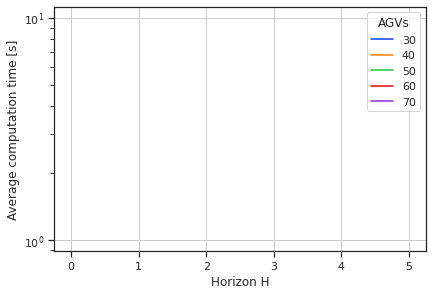

In [11]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

plt.figure(1)
ax = plt.gca()
ax.set(yscale="log")
sns.lineplot(x="horizon", y="comp_time_avg",
            hue="AGVs",
            ci=100,
            data=df,
            palette=sns_col)
plt.xlabel("Horizon H")
plt.ylabel("Average computation time [s]")
plt.grid()

ax = plt.gca()
ax.figure.set_size_inches(6,4)
plt.subplots_adjust(left=0.12, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

save_loc = "/home/alberndt/Documents/research/bosch/figures/"
plt.savefig(save_loc + "avg_comp_time.pdf", format="pdf", pad_inches=0.01, transparent=True)

### 3 Plot max computation time

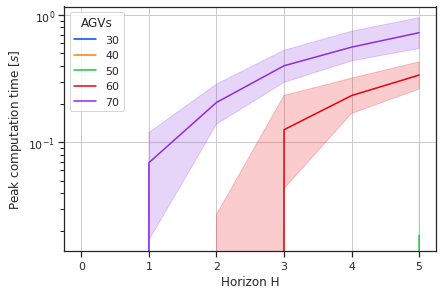

In [13]:
sns.set(style="ticks")
sns.set_palette("bright")
sns_col = sns.color_palette("bright", n_colors=5)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

plt.figure(1)
ax = plt.gca()
ax.set(yscale="log")
sns.lineplot(x="horizon", y="comp_time_max",
            hue="AGVs",
            ci=100,
            data=df,
            palette=sns_col)

plt.xlabel("Horizon H")
plt.ylabel("Peak computation time $[s]$")
plt.grid()

ax = plt.gca()
ax.figure.set_size_inches(6,4)
plt.subplots_adjust(left=0.12, bottom=0.13, right=0.98, top=0.98, wspace=None, hspace=None)

plt.savefig(save_loc + "max_comp_time.pdf", format="pdf", pad_inches=0.01, transparent=True)